In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving schonell - Copy.csv to schonell - Copy.csv


In [76]:
data = pd.read_csv('schonell - Copy.csv')

In [77]:
data.head(20)

,BAY,BAM,Gender,Score,SAY,SAM,SLD
0,17,1,M,62,11,2,Severe
1,12,8,F,32,8,2,Severe
2,10,7,M,34,8,4,Severe
3,13,10,F,1,5,1,Severe
4,6,11,M,5,5,5,Severe
5,14,7,M,54,10,4,Severe
6,7,1,F,28,7,8,Well
7,9,7,F,35,8,5,Severe
8,16,9,F,41,9,1,Severe
9,6,1,M,62,11,2,Well


In [78]:
data.shape

(33936, 7)

In [79]:
data.isna().sum()

BAY       0
BAM       0
Gender    0
Score     0
SAY       0
SAM       0
SLD       0
dtype: int64

In [80]:
data['SLD'].value_counts()

Severe     20784
Well       10960
Mild        1010
Good         980
Neutral      202
Name: SLD, dtype: int64

In [81]:
data.cov()

,BAY,BAM,Score,SAY,SAM
BAY,1.625048e+01,0.000000e+00,0.000000,-1.172547e-17,-3.182628e-17
BAM,0.000000e+00,1.191702e+01,0.000000,-9.212872e-18,-2.973245e-17
Score,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00
SAY,-1.172547e-17,-9.212872e-18,84.408428,8.465106e+00,-2.426304e-01
SAM,-3.182628e-17,-2.973245e-17,5.940769,-2.426304e-01,8.367073e+00


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33936 entries, 0 to 33935
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BAY     33936 non-null  int64 
 1   BAM     33936 non-null  int64 
 2   Gender  33936 non-null  object
 3   Score   33936 non-null  int64 
 4   SAY     33936 non-null  int64 
 5   SAM     33936 non-null  int64 
 6   SLD     33936 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [83]:
data['BTM'] = data['BAY']*12+data['BAM']
data['STM'] = data['SAY']*12+data['SAM']
data['Diff'] = data['STM']-data['BTM']

In [12]:
data.head(20)

,BAY,BAM,Gender,Score,SAY,SAM,SLD,BTM,STM,Diff
0,17,1,M,62,11,2,Severe,205,134,-71
1,12,8,F,32,8,2,Severe,152,98,-54
2,10,7,M,34,8,4,Severe,127,100,-27
3,13,10,F,1,5,1,Severe,166,61,-105
4,6,11,M,5,5,5,Severe,83,65,-18
5,14,7,M,54,10,4,Severe,175,124,-51
6,7,1,F,28,7,8,Well,85,92,7
7,9,7,F,35,8,5,Severe,115,101,-14
8,16,9,F,41,9,1,Severe,201,109,-92
9,6,1,M,62,11,2,Well,73,134,61


In [17]:
data = data.drop(['BAY','BAM','SAY','SAM'], axis=1)

In [19]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['Gender', 'SLD'], dtype='object')


In [21]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [22]:
print(LE.classes_)

['Good' 'Mild' 'Neutral' 'Severe' 'Well']


In [23]:
data.head(30)

,Gender,Score,SLD,BTM,STM,Diff
0,1,62,3,205,134,-71
1,0,32,3,152,98,-54
2,1,34,3,127,100,-27
3,0,1,3,166,61,-105
4,1,5,3,83,65,-18
5,1,54,3,175,124,-51
6,0,28,4,85,92,7
7,0,35,3,115,101,-14
8,0,41,3,201,109,-92
9,1,62,4,73,134,61


In [24]:
data.describe()

,Gender,Score,SLD,BTM,STM,Diff
count,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000
mean,0.500000,50.000000,3.170851,143.500000,119.108911,-24.391089
std,0.500007,29.155189,0.823828,48.497278,34.950239,59.778802
min,0.000000,0.000000,0.000000,60.000000,60.000000,-167.000000
25%,0.000000,25.000000,3.000000,101.750000,89.000000,-68.000000
50%,0.500000,50.000000,3.000000,143.500000,120.000000,-24.000000
75%,1.000000,75.000000,4.000000,185.250000,149.000000,19.000000
max,1.000000,100.000000,4.000000,227.000000,180.000000,120.000000


In [25]:
data.cov()

,Gender,Score,SLD,BTM,STM,Diff
Gender,2.500074e-01,0.000000,1.046917e-19,0.000000e+00,2.010081e-17,-2.847615e-17
Score,0.000000e+00,850.025048,5.892441e+00,0.000000e+00,1.018842e+03,1.018842e+03
SLD,1.046917e-19,5.892441,6.786918e-01,-1.114522e+01,7.066643e+00,1.821186e+01
BTM,0.000000e+00,0.000000,-1.114522e+01,2.351986e+03,-1.715269e-15,-2.351986e+03
STM,2.010081e-17,1018.841904,7.066643e+00,-1.715269e-15,1.221519e+03,1.221519e+03
Diff,-2.847615e-17,1018.841904,1.821186e+01,-2.351986e+03,1.221519e+03,3.573505e+03


In [26]:
corr = data.corr()

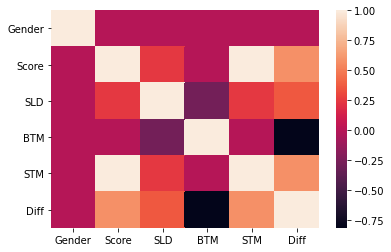

In [27]:
sns.heatmap(corr)

In [28]:
import sympy 

In [29]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 0, 0, 0,  0],
[0, 1, 0, 0, 0,  0],
[0, 0, 1, 0, 0,  0],
[0, 0, 0, 1, 0, -1],
[0, 0, 0, 0, 1,  1],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 0, 0, 0, 0,  0],
[0, 

In [30]:
inds

(0, 1, 2, 3, 4)

In [31]:
inds = list(inds)
inds

[0, 1, 2, 3, 4]

In [33]:
for i in range(5):
    if(i not in inds):
        print(data.columns[i])

In [34]:
data.head(20)

,Gender,Score,SLD,BTM,STM,Diff
0,1,62,3,205,134,-71
1,0,32,3,152,98,-54
2,1,34,3,127,100,-27
3,0,1,3,166,61,-105
4,1,5,3,83,65,-18
5,1,54,3,175,124,-51
6,0,28,4,85,92,7
7,0,35,3,115,101,-14
8,0,41,3,201,109,-92
9,1,62,4,73,134,61


In [35]:
data.cov()

,Gender,Score,SLD,BTM,STM,Diff
Gender,2.500074e-01,0.000000,1.046917e-19,0.000000e+00,2.010081e-17,-2.847615e-17
Score,0.000000e+00,850.025048,5.892441e+00,0.000000e+00,1.018842e+03,1.018842e+03
SLD,1.046917e-19,5.892441,6.786918e-01,-1.114522e+01,7.066643e+00,1.821186e+01
BTM,0.000000e+00,0.000000,-1.114522e+01,2.351986e+03,-1.715269e-15,-2.351986e+03
STM,2.010081e-17,1018.841904,7.066643e+00,-1.715269e-15,1.221519e+03,1.221519e+03
Diff,-2.847615e-17,1018.841904,1.821186e+01,-2.351986e+03,1.221519e+03,3.573505e+03


In [36]:
data.cov()

,Gender,Score,SLD,BTM,STM,Diff
Gender,2.500074e-01,0.000000,1.046917e-19,0.000000e+00,2.010081e-17,-2.847615e-17
Score,0.000000e+00,850.025048,5.892441e+00,0.000000e+00,1.018842e+03,1.018842e+03
SLD,1.046917e-19,5.892441,6.786918e-01,-1.114522e+01,7.066643e+00,1.821186e+01
BTM,0.000000e+00,0.000000,-1.114522e+01,2.351986e+03,-1.715269e-15,-2.351986e+03
STM,2.010081e-17,1018.841904,7.066643e+00,-1.715269e-15,1.221519e+03,1.221519e+03
Diff,-2.847615e-17,1018.841904,1.821186e+01,-2.351986e+03,1.221519e+03,3.573505e+03


In [37]:
data = data.drop(['Gender'], axis = 1) 

In [38]:
data.head(20)

,Score,SLD,BTM,STM,Diff
0,62,3,205,134,-71
1,32,3,152,98,-54
2,34,3,127,100,-27
3,1,3,166,61,-105
4,5,3,83,65,-18
5,54,3,175,124,-51
6,28,4,85,92,7
7,35,3,115,101,-14
8,41,3,201,109,-92
9,62,4,73,134,61


In [39]:
corr = data.corr()

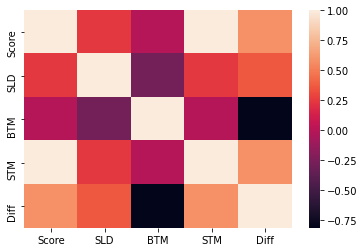

In [40]:
sns.heatmap(corr)

In [41]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [42]:
data.head()

,Score,SLD,BTM,Diff
0,62,3,205,-71
1,32,3,152,-54
2,34,3,127,-27
3,1,3,166,-105
4,5,3,83,-18


In [45]:
data = data.drop(['Diff'], axis = 1) 

In [45]:
data.shape

(33936, 3)

In [46]:
data = data.drop_duplicates()

In [47]:
data.shape

(16968, 3)

In [48]:
data.head()

,Score,SLD,BTM
0,62,3,205
1,32,3,152
2,34,3,127
3,1,3,166
4,5,3,83


In [49]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Score,SLD,BTM
0,1,3,160
1,56,4,120
2,36,4,70
3,2,3,188
4,50,1,125


In [50]:
X=data.drop(['SLD'],axis=1).values
y=data['SLD'].values
print(X.shape, y.shape)

(16968, 2) (16968,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [52]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(12726, 2) (12726,)
(4242, 2) (4242,)


In [53]:
from keras.utils import to_categorical

In [54]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

In [55]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12726, 2) (12726, 5)
(4242, 2) (4242, 5)


In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               7600      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
____________________________________________________

In [58]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True)

Epoch 1/100
531/531 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8915
Epoch 2/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9367
Epoch 3/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1079 - accuracy: 0.9573
Epoch 4/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9612
Epoch 5/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9704
Epoch 6/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9748
Epoch 7/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9753
Epoch 8/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9771
Epoch 9/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9767
Epoch 10/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0498 - accura

In [59]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9874


In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Testing Accuracy: 0.9577


In [60]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    #plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    #plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training Loss')
    plt.legend()

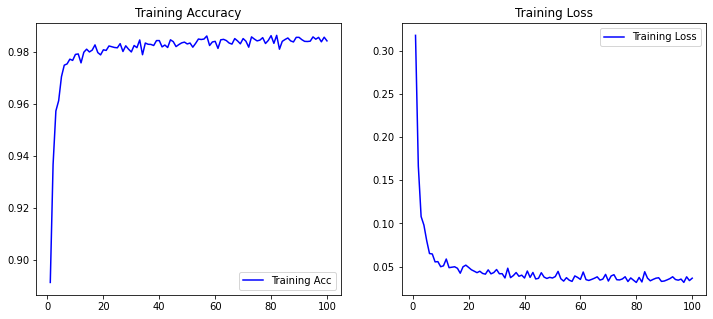

In [61]:
plot_history(history)

In [62]:
pred = model.predict([[60,31]])
classes = pred[0]
print(classes)
print(len(classes))
final=np.where(classes==max(classes))

[9.859795e-34 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]
5


In [63]:
print(final)

(array([4]),)


In [64]:
if(final[0]==0):
    print("Good")
elif(final[0]==1):
    print("Mild")
elif(final[0]==2):
    print("Neutral")
elif(final[0]==3):
    print("Severe")
elif(final[0]==4):
    print("Well")    

Well


In [65]:
from keras.models import model_from_json

In [66]:
model_json = model.to_json()

In [67]:
with open("schonell.json", "w") as json_file:
    json_file.write(model_json)

In [68]:
model.save_weights("schonell.h5")

In [69]:
json_file = open('schonell.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("schonell.h5")

In [70]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               7600      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
____________________________________________________

In [72]:
loss, accuracy = loaded_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9874


In [73]:
import datetime
currentDate = datetime.datetime.now()
deadlineDate= datetime.datetime.strptime(deadline,'%d-%m-%Y')

daysLeft = deadlineDate - currentDate

years = ((daysLeft.total_seconds())/(365.242*24*3600))
yearsInt=int(years)

months=(years-yearsInt)*12
monthsInt=int(months)


years = ((daysLeft.total_seconds())/(365.242*24*3600))
yearsInt=int(years)

months=(years-yearsInt)*12
monthsInt=int(months)

BTM = (yearsInt*12)+monthsInt
BTM = abs(BTM)

In [85]:
data = data.drop(['BAY','BAM','BTM','Gender','SAM','SAY'], axis=1)

In [86]:
data.head()

,Score,SLD,STM,Diff
0,62,Severe,134,-71
1,32,Severe,98,-54
2,34,Severe,100,-27
3,1,Severe,61,-105
4,5,Severe,65,-18


In [89]:
data = data.drop(['SLD'], axis=1)

In [90]:
data.head()

,Score,STM
0,62,134
1,32,98
2,34,100
3,1,61
4,5,65


In [95]:
data = data.drop_duplicates()

In [96]:
X = data['Score']
y = data['STM']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [97]:
input_dim = 1
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_20 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_21 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [98]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    verbose=True)

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 14829.0557
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 13932.4336
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 12919.3896
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 11597.3193
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 9987.6934
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 8068.9043
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 5781.4014
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 3459.5757
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 1547.5880
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 873.7967
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 1450.2766
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 1452.1927
Epoch 13/500
4/4 [====

In [99]:
from sklearn.metrics import mean_squared_error

In [106]:
pred = model.predict([[X_train]])
pred1 = model.predict([[X_test]])

In [108]:
mean_squared_error(y_train, pred, squared=False)

0.6293309224769698

In [107]:
mean_squared_error(y_test, pred1, squared=False)

0.821398509762107


In [109]:
pred = model.predict([[1]])

In [110]:
pred

array([[60.88731]], dtype=float32)

In [111]:
ans = pred[0][0]
ans = int(round(ans))
ans

61

In [112]:
model_json = model.to_json()
with open("schonell1.json", "w") as json_file:
    json_file.write(model_json)


In [113]:
model.save_weights("schonell1.h5")

In [114]:
json_file = open('schonell1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("schonell1.h5")

In [115]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_20 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_21 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [116]:
loaded_model.predict([[1]])

array([[60.88731]], dtype=float32)